In [1]:
import polarTransform
import cv2
import shutil
import os
from PIL import Image

In [2]:
#read in variables from the other sheet
%store -r video_name
%store -r cwd
%store -r final_images_cwd
%store -r final_image_barcode

In [3]:
barcode_image_path = os.path.join(final_images_cwd, final_image_barcode)

In [4]:
#read in barcode
barcode_image = cv2.imread(barcode_image_path)

In [5]:
#set colour of inside circle
color = [255, 255, 255] #white

# border widths
bottom = 350*1
left, right, top = [0]*3
barcode_image = cv2.copyMakeBorder(barcode_image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)

In [6]:
#rotate the image 90 degrees clockwise - this is so the white cirlce is in the middle, as opposed to on the outside
barcode_rotated = cv2.rotate(barcode_image, cv2.ROTATE_90_CLOCKWISE)

In [7]:
#warp the barcode to circular
dims = barcode_rotated.shape[:-1]
cols,rows = dims

#these integer division values are to expand or shrink the final area of the output - should be played with to get optimal performance - these worked for me.
dsize_args = (int(cols/2.5), rows*3)

#max radius can be played around with here
movie_iris = cv2.warpPolar(src = barcode_rotated, dsize = dsize_args, center = (int(dsize_args[0]/ 2), int(dsize_args[1]/2)), maxRadius = int(rows/1.2), flags=cv2.WARP_INVERSE_MAP + cv2.WARP_FILL_OUTLIERS)

In [8]:
#rotate it 90 degrees counterclockwise - this ensures the video starts and ends at 12
movie_iris_rotated = cv2.rotate(movie_iris, cv2.ROTATE_90_COUNTERCLOCKWISE)

#write the movie to the main directory
final_image_circle = '{0}_iris.png'.format(video_name)
cv2.imwrite(final_image_circle, movie_iris_rotated)

#move the file over to the final_images directory
source = os.path.join(cwd, final_image_circle)
destination = final_images_cwd
shutil.move(source, destination);

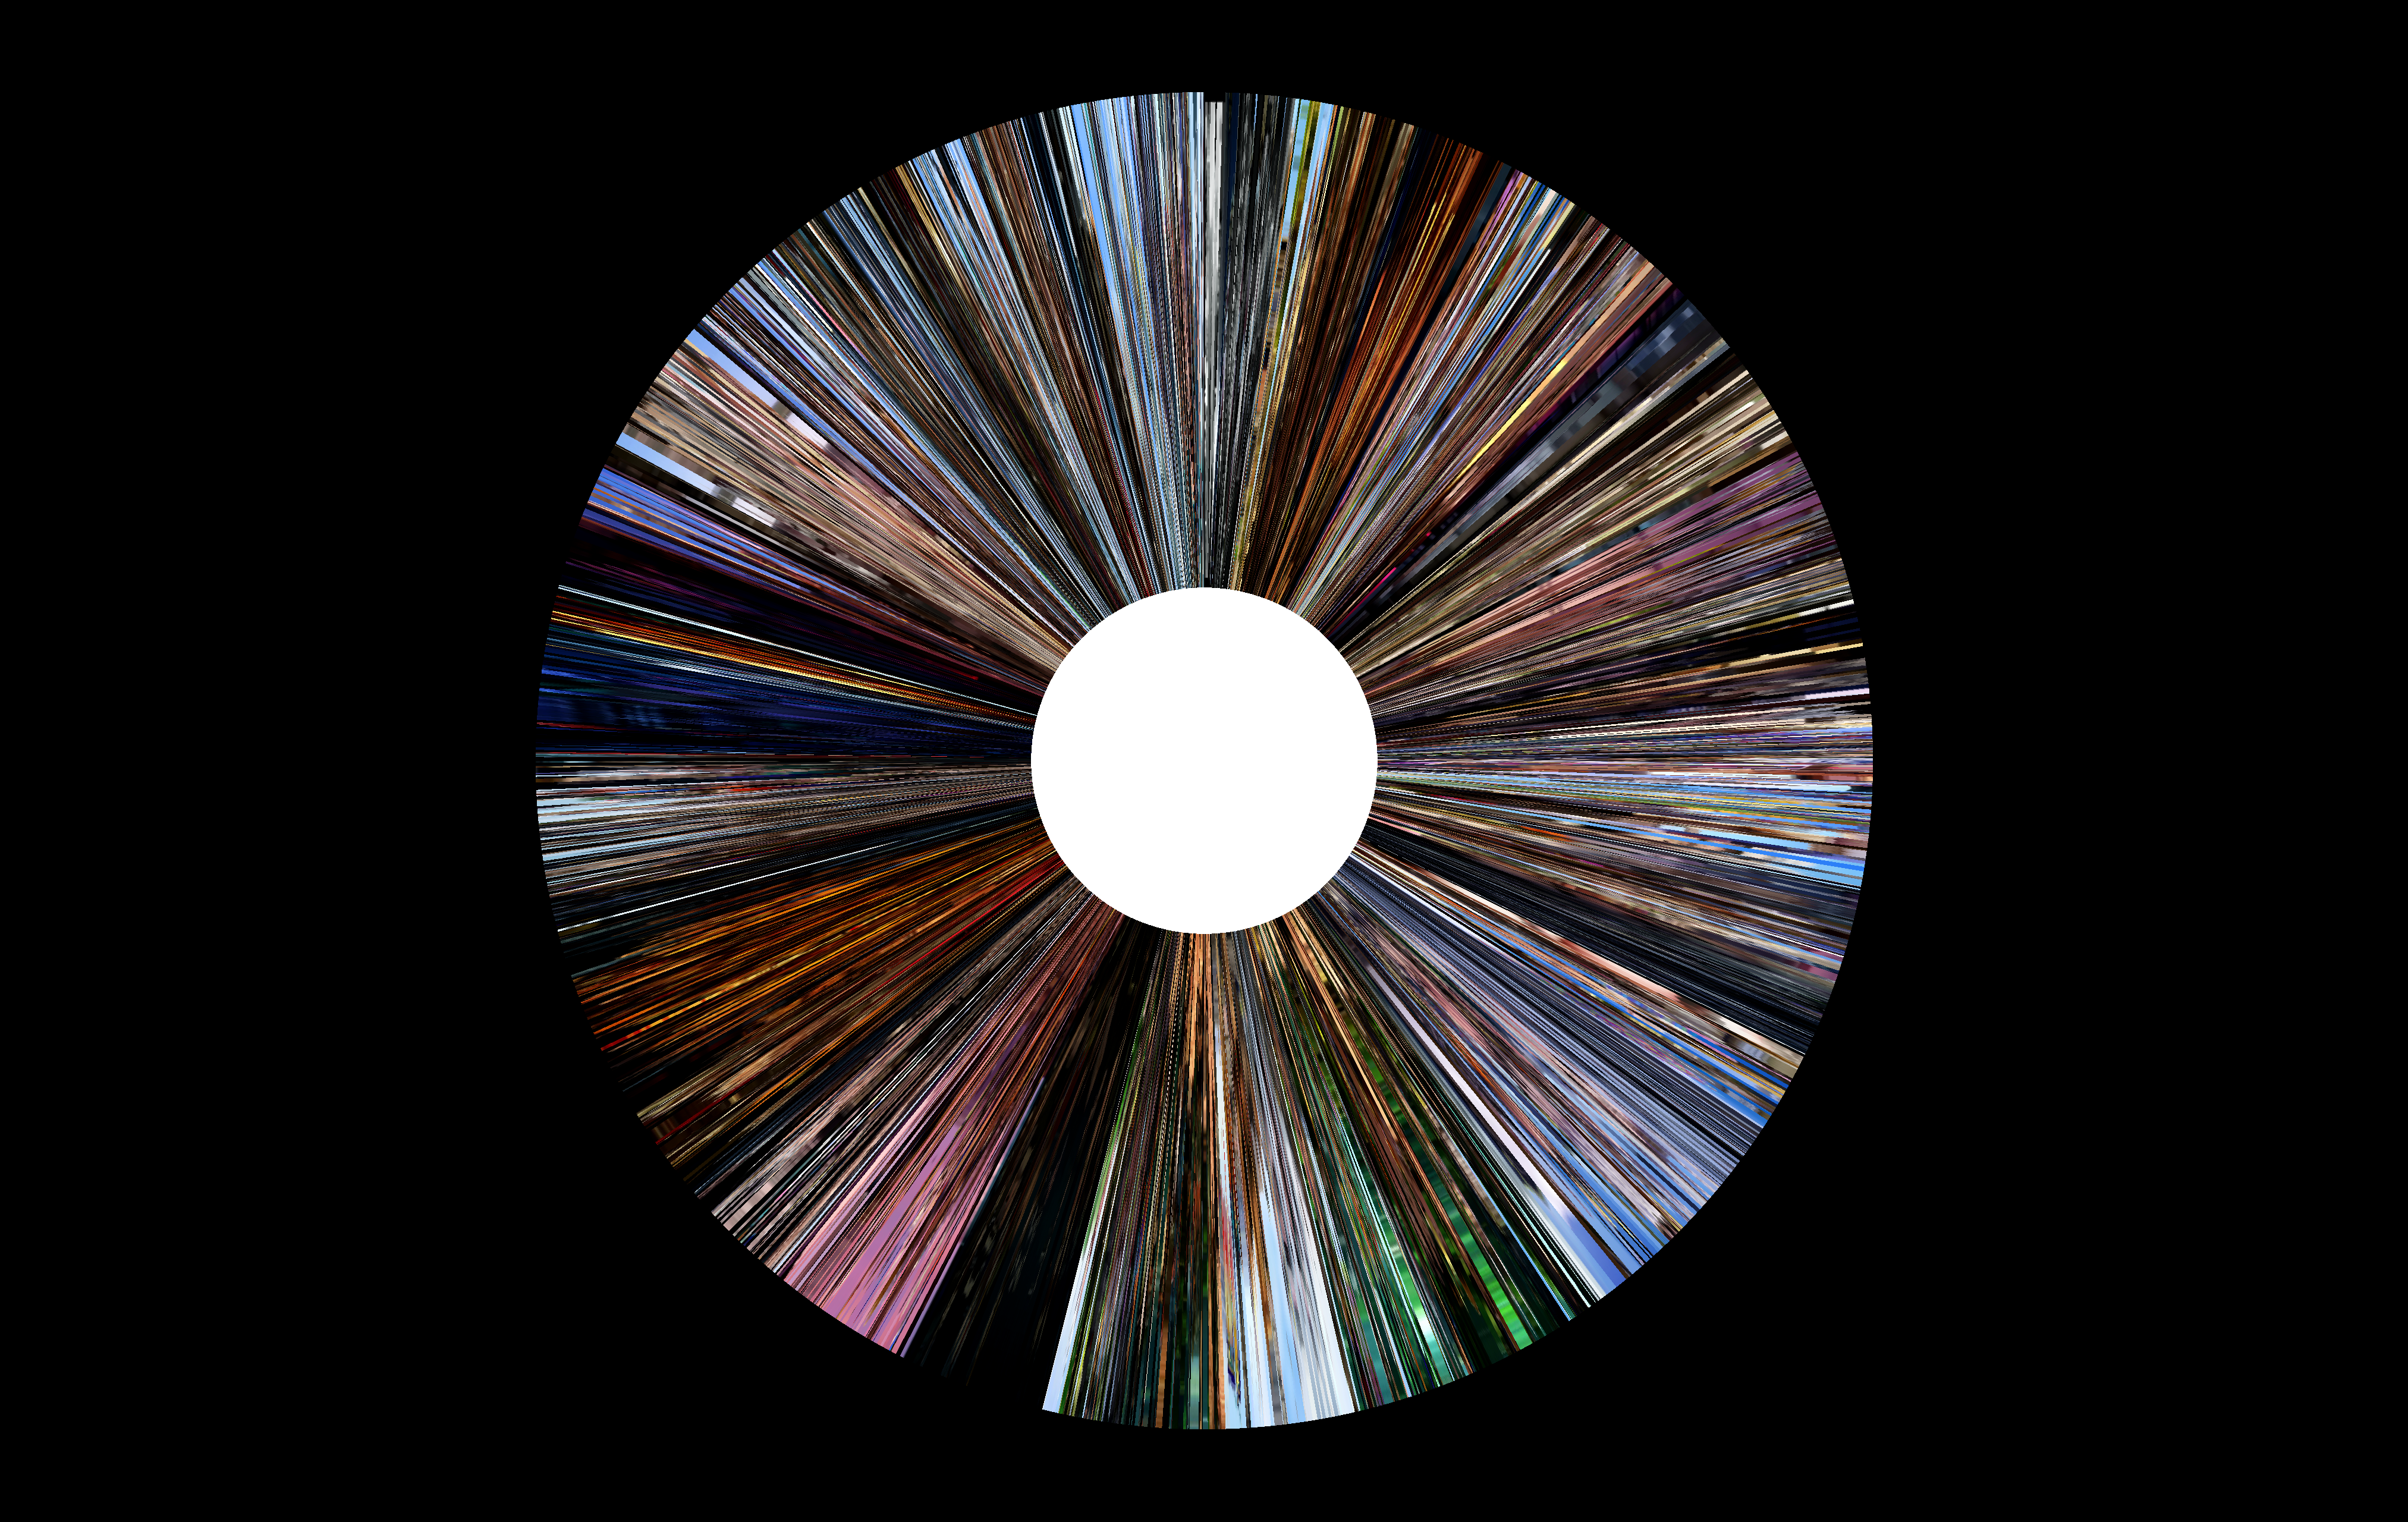

In [9]:
final_image = final_images_cwd + '/' + '{0}_iris.png'.format(video_name)
displayed_image = Image.open(final_image)
displayed_image